<center>
<img src="https://drive.google.com/uc?id=1f1gGVI-rxcHjA90WEGNvvtSXF1pAxQwg" alt="Fasilkom UI" width="300"/>

CSGE603130 • Kecerdasan Artifisial dan Sains Data Dasar

Semester Ganjil 2023/2024

Fakultas Ilmu Komputer, Universitas Indonesia

##**Lab *8*: *Clustering***

###**Tenggat Waktu: XX Bulan 2023, 23.55 WIB**
</center>

####**Ketentuan:**

1. Dokumen *template* lab dengan format .ipynb dan dataset (jika dibutuhkan) telah disediakan di SCeLe
2. Jalankan kode pada dokumen .ipynb dan perhatikan dengan saksama apa yang potongan kode tersebut lakukan beserta dengan keluarannya. Jawablah **pertanyaan yang disisipkan** pada potongan program yang diberikan.
3. Dokumen Jupyter Notebook yang telah dilengkapi dengan jawaban dikumpulkan dengan format penamaan **Kelas_LabX_NPM_Nama.ipynb**. Contoh: A_Lab1_2006123456_Budi.ipynb
4. Kumpulkan dokumen tersebut pada submisi yang telah disediakan di SCeLe sesuai dengan kelas masing-masing sebelum **XX Bulan 2023, 23.55 WIB**. Keterlambatan pengumpulan akan dikenakan pinalti.
5. Lab ini dirancang sebagai **tugas mandiri**. Plagiarisme tidak diperkenankan dalam bentuk apapun. Adapun kolaborasi berupa diskusi (tanpa menyalin maupun mengambil jawaban orang lain) dan literasi masih diperbolehkan dengan mencantumkan kolaborator dan sumber.


# Deskripsi Dataset

Penjelasan dataset:

1. **mcg**: McGeoch's method for signal sequence recognition.
2. **gvh**: von Heijne's method for signal sequence recognition.
3. **lip**: von Heijne's Signal Peptidase II consensus sequence score. Binary attribute.
4. **chg**: Presence of charge on N-terminus of predicted lipoproteins. Binary attribute.
5. **aac**: score of discriminant analysis of the amino acid content of outer membrane and periplasmic proteins.
6. **alm1**: score of the ALOM membrane spanning region prediction program.
7. alm2: score of ALOM program after excluding putative cleavable signal regions from the sequence.

Dataset source: https://archive.ics.uci.edu/dataset/39/ecoli

In [69]:
# Impor library dan modul yang dibutuhkan pada tugas ini (boleh ditambahkan jika kurang)
import pandas as pd, numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_samples, silhouette_score
from yellowbrick.cluster import SilhouetteVisualizer
import matplotlib.cm as cm
import scipy.cluster.hierarchy as shc
from sklearn.cluster import AgglomerativeClustering

from sklearn.decomposition import PCA

# **Clustering**

# **Preparing Dataset**

### **Pengertian**

**Pengelompokan atau *clustering***, yang merupakan bagian dari unsupervised learning, melibatkan proses mengelompokkan sejumlah titik data ke dalam beberapa kelompok atau klaster sedemikian rupa sehingga objek dalam klaster yang sama memiliki tingkat kemiripan yang tinggi, sementara objek dalam klaster yang berbeda memiliki tingkat kemiripan yang rendah. Berbeda dengan supervised learning, clustering tidak memerlukan label yang terkait dengan setiap objek; sebaliknya, tujuannya adalah untuk menemukan pola dalam data, yang mungkin ada atau mungkin juga tidak (data mungkin tidak memiliki klaster yang jelas). Penting untuk dicatat bahwa algoritma pengelompokan tidak menjelaskan secara eksplisit makna dari setiap klaster, sehingga Anda perlu menginterpretasikannya sendiri, mungkin dengan melakukan visualisasi seperti yang akan dibahas dalam sesi lab kali ini.

### **Motivasi**

Motivasi dari _unsupervised learning_ adalah untuk mengungkap pola, struktur, dan wawasan yang mungkin tersembunyi dalam data tanpa adanya petunjuk atau label yang jelas. Berikut adalah beberapa alasan mengapa _unsupervised learning_ sangat penting dan memiliki motivasi yang kuat:

1. **Penemuan Pola Tersembunyi**: Seringkali, data dunia nyata tidak selalu dilengkapi dengan label yang menjelaskan apa yang ada di dalamnya. Dalam banyak kasus, kita mungkin tidak tahu apa yang harus dicari atau apa yang mungkin ada dalam data. _Unsupervised learning_ memungkinkan kita untuk mengeksplorasi data dan menemukan pola atau struktur yang mungkin tersembunyi, tanpa harus memiliki pengetahuan sebelumnya tentang apa yang harus dicari.

2. **Segmentasi Data**: _Unsupervised learning_ memungkinkan kita untuk mengelompokkan data ke dalam kelompok atau klaster yang memiliki karakteristik atau kemiripan tertentu. Contohnya, dalam analisis pelanggan, kita dapat mengelompokkan pelanggan ke dalam segmen yang berbeda berdasarkan perilaku atau preferensi mereka. Ini dapat membantu perusahaan dalam mengarahkan strategi pemasaran yang lebih efektif.

3. **Ekstraksi Fitur**: Algoritma _unsupervised learning_ dapat digunakan untuk mengekstraksi fitur-fitur penting dari data. Ini bermanfaat dalam mereduksi dimensi data, mengurangi kebisingan, atau mengungkapkan karakteristik yang relevan dalam dataset yang besar. Contohnya, dalam pengolahan citra, kita dapat menggunakan _dimensionality reduction_ untuk mengurangi jumlah fitur yang tidak relevan.

4. **Anomali Detection**: _Unsupervised learning_ juga dapat digunakan untuk mendeteksi anomali dalam data. Ini berguna dalam kasus di mana kita mencoba menemukan data yang tidak biasa atau data yang tidak mengikuti pola mayoritas. Misalnya, dalam keamanan jaringan, kita dapat menggunakan _unsupervised learning_ untuk mendeteksi serangan siber yang tidak biasa.

5. **Preprocessing Data**: _Unsupervised learning_ sering digunakan sebagai tahap awal dalam analisis data sebelum kita beralih ke metode _supervised learning_. Ini termasuk membersihkan data, mengisi data yang hilang, atau mengurangi dimensi data sebelum melatih model prediksi.

6. **Penelitian Ilmiah dan Penemuan Baru**: Dalam beberapa kasus, _unsupervised learning_ digunakan dalam penelitian ilmiah untuk menemukan wawasan baru dalam data. Contohnya, dalam bidang ilmu genetika, analisis _unsupervised learning_ dapat membantu mengungkap pola baru dalam ekspresi gen atau perbedaan dalam populasi.

Dalam rangkaian kasus di atas, _unsupervised learning_ memberikan cara untuk mengungkap dan memahami data yang mungkin sulit dipahami atau dianalisis dengan metode lain. Ini membuatnya menjadi alat yang kuat dalam berbagai bidang, termasuk ilmu data, kecerdasan buatan, pengolahan bahasa alami, penglihatan komputer, dan banyak lagi.

### **Jenis-jenis Algoritma**

Ada banyak algoritma _clustering_ yang digunakan untuk mengelompokkan data dalam berbagai konteks. Berikut beberapa algoritma _clustering_ yang umum digunakan:

1. **K-Means**: Algoritma _K-Means_ adalah salah satu algoritma _clustering_ paling populer. Ini membagi data menjadi _K_ kluster di mana setiap titik data termasuk dalam kluster dengan pusat yang terdekat. Tujuan utamanya adalah untuk mengurangi variasi dalam kluster dan memaksimalkan variasi antara kluster.

2. **Hierarchical Clustering**: Algoritma _clustering_ hierarki membangun hirarki kluster dengan menggabungkan atau membagi kluster dalam langkah-langkah yang berurutan. Ini menghasilkan pohon kluster yang dapat diwakili sebagai _dendrogram_, yang memungkinkan analisis tingkat hierarki.

3. **DBSCAN (Density-Based Spatial Clustering of Applications with Noise)**: Algoritma _DBSCAN_ mengelompokkan data berdasarkan kerapatan. Ini mengidentifikasi kluster sebagai daerah di mana terdapat titik data yang cukup padat, sementara titik yang berada jauh dari kluster dianggap sebagai _noise_.

4. **Agglomerative Clustering**: Ini adalah pendekatan hierarkis untuk pengelompokan di mana setiap titik data dianggap sebagai kluster tunggal dan kemudian secara berurutan menggabungkan kluster yang paling dekat satu sama lain hingga satu kluster besar terbentuk.

Pilihan algoritma _clustering_ bergantung pada karakteristik data dan tujuan analisis. Setiap algoritma memiliki kelebihan dan kelemahan yang harus dipertimbangkan sesuai dengan kebutuhan Anda.

Pada lab kali ini kita hanya akan membahas atau menggunakan beberapa algoritma yang dijelaskan pada slide yang tersedia yakni **K-Means** dan **Hierarchical**

# **Latihan Soal Praktis** [70]

### Preprocessing

In [70]:
# Import dataset diamonds dan menampilkan 5 row teratas
import pandas as pd

df = pd.read_csv('ecoli.csv')
df.head()

,mcg,gvh,lip,chg,aac,alm1,alm2,class
0,0.49,0.29,0.48,0.5,0.56,0.24,0.35,1
1,0.07,0.40,0.48,0.5,0.54,0.35,0.44,1
2,0.56,0.40,0.48,0.5,0.49,0.37,0.46,1
3,0.59,0.49,0.48,0.5,0.52,0.45,0.36,1
4,0.23,0.32,0.48,0.5,0.55,0.25,0.35,1


In [71]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 336 entries, 0 to 335
Data columns (total 8 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   mcg     336 non-null    float64
 1   gvh     336 non-null    float64
 2   lip     336 non-null    float64
 3   chg     336 non-null    float64
 4   aac     336 non-null    float64
 5   alm1    336 non-null    float64
 6   alm2    336 non-null    float64
 7   class   336 non-null    int64  
dtypes: float64(7), int64(1)
memory usage: 21.1 KB


In [72]:
# Melihat deskripsi statistik dari kelompok fitur numerik
df.describe()

,mcg,gvh,lip,chg,aac,alm1,alm2,class
count,336.000000,336.000000,336.000000,336.000000,336.000000,336.000000,336.000000,336.000000
mean,0.500060,0.500000,0.495476,0.501488,0.500030,0.500179,0.499732,3.145833
std,0.194634,0.148157,0.088495,0.027277,0.122376,0.215751,0.209411,2.645105
min,0.000000,0.160000,0.480000,0.500000,0.000000,0.030000,0.000000,1.000000
25%,0.340000,0.400000,0.480000,0.500000,0.420000,0.330000,0.350000,1.000000
50%,0.500000,0.470000,0.480000,0.500000,0.495000,0.455000,0.430000,2.000000
75%,0.662500,0.570000,0.480000,0.500000,0.570000,0.710000,0.710000,5.000000
max,0.890000,1.000000,1.000000,1.000000,0.880000,1.000000,0.990000,8.000000


In [73]:
def cek_missing_values(df):
    col_na = df.isnull().sum().sort_values(ascending=False)
    percent = col_na / len(df)

    missing_data = pd.concat([col_na, percent], axis=1, keys=['Total', 'Percent'])
    return missing_data[missing_data['Total'] > 0]

cek_missing_values(df)

,Total,Percent


In [74]:
# Melihat jumlah duplikasi data
print('Jumlah duplikasi pada data adalah', df.duplicated(keep=False).sum())

Jumlah duplikasi pada data adalah 0


In [75]:
# Melihat jumlah kemungkinan adanya outliers pada data menggunakan IQR

# Menghitung quartil 1 dan 3.
Q1 = df.quantile(0.25)
Q3 = df.quantile(0.75)

# Menghitung RUB dan RLB.
IQR = Q3 - Q1
lower_limit = Q1 - 1.5*IQR
upper_limit = Q3 + 1.5*IQR

# Menampilkan banyaknya outlier pada atribut.
outliers = (df < lower_limit) | (df > upper_limit)
print ("Outlier pada tiap atribut:")
print(outliers.sum())

Outlier pada tiap atribut:
mcg       0
gvh      13
lip      10
chg       1
aac       9
alm1      0
alm2      0
class     0
dtype: int64


In [76]:
import pandas as pd
from sklearn.preprocessing import StandardScaler

# Assuming df is your original DataFrame

# Initialize the StandardScaler
scaler = StandardScaler()

# Fit the scaler on the data
scaler.fit(df)

# Standardize the data
scaled_data = scaler.transform(df)

# Convert the scaled data back into a pandas DataFrame
scaled_df = pd.DataFrame(scaled_data, index=df.index, columns=df.columns)

# Now you can use the head() method
print(scaled_df.head())


        mcg       gvh       lip       chg       aac      alm1      alm2  \
0 -0.051761 -1.419531 -0.175142 -0.054636  0.490781 -1.207717 -0.716084   
1 -2.212876 -0.675967 -0.175142 -0.054636  0.327106 -0.697111 -0.285665   
2  0.308424 -0.675967 -0.175142 -0.054636 -0.082081 -0.604273 -0.190016   
3  0.462790 -0.067597 -0.175142 -0.054636  0.163431 -0.232923 -0.668259   
4 -1.389594 -1.216741 -0.175142 -0.054636  0.408944 -1.161299 -0.716084   

      class  
0 -0.812457  
1 -0.812457  
2 -0.812457  
3 -0.812457  
4 -0.812457  


**Prapemrosesan data:**
Sebelum menjalankan algoritma clustering, pastikan Anda memahami dataset yang digunakan (minimal mengetahui fitur-fitur apa saja yang ada beserta tipe datanya). Selain itu, lakukan pre-processing pada data agar siap digunakan untuk clustering menggunakan K-Means. Berikut adalah hal-hal yang perlu dilakukan.

- Handle missing value: Untuk menentukan klaster, diperlukan perhitungan jarak sedangkan missing value tidak bisa dihitung jaraknya. Contoh penanganannya adalah imputasi dengan mean/median tergantung bentuk distribusi data.
- Handle outliers: Algoritma K-Means sangat sensitif terhadap outliers (dapat memengaruhi klaster yang terbentuk). Oleh karena itu, jangan lupa untuk meng-handle outliers dengan heuristics tertentu (misalnya dengan metode capping).
- Standarisasi: K-Means juga sensitif terhadap rentang yang berbeda-beda dari atribut yang digunakan sehingga perlu dilakukan standarisasi data (misal dengan StandardScaler).
- Encoding: Kita bisa juga mengombinasikan atribut numerik dan kategorikal pada K-Means dengan cara mengkodekan atribut kategorikal ke dalam bentuk numerik (misalnya dengan LabelEncoder), kemudian memprosesnya seperti biasa (meskipun ada metode lain seperti K-Prototypes, tetapi hal tersebut di luar scope lab ini).

In [78]:
# TODO: After preprocess the data, select some columns for clustering and assign it as X
X = df[['mcg', 'gvh', 'lip', 'aac', 'alm1', 'alm2']]

## K-Means Clustering [35]

For n_clusters = 2 The average silhouette_coefficient is : 0.4056270989464024
For n_clusters = 3 The average silhouette_coefficient is : 0.418134995722642
For n_clusters = 4 The average silhouette_coefficient is : 0.3665711328501481
For n_clusters = 5 The average silhouette_coefficient is : 0.25795499423521123
For n_clusters = 6 The average silhouette_coefficient is : 0.2659133625305286
For n_clusters = 7 The average silhouette_coefficient is : 0.2609613545439706
For n_clusters = 8 The average silhouette_coefficient is : 0.2537990256367368


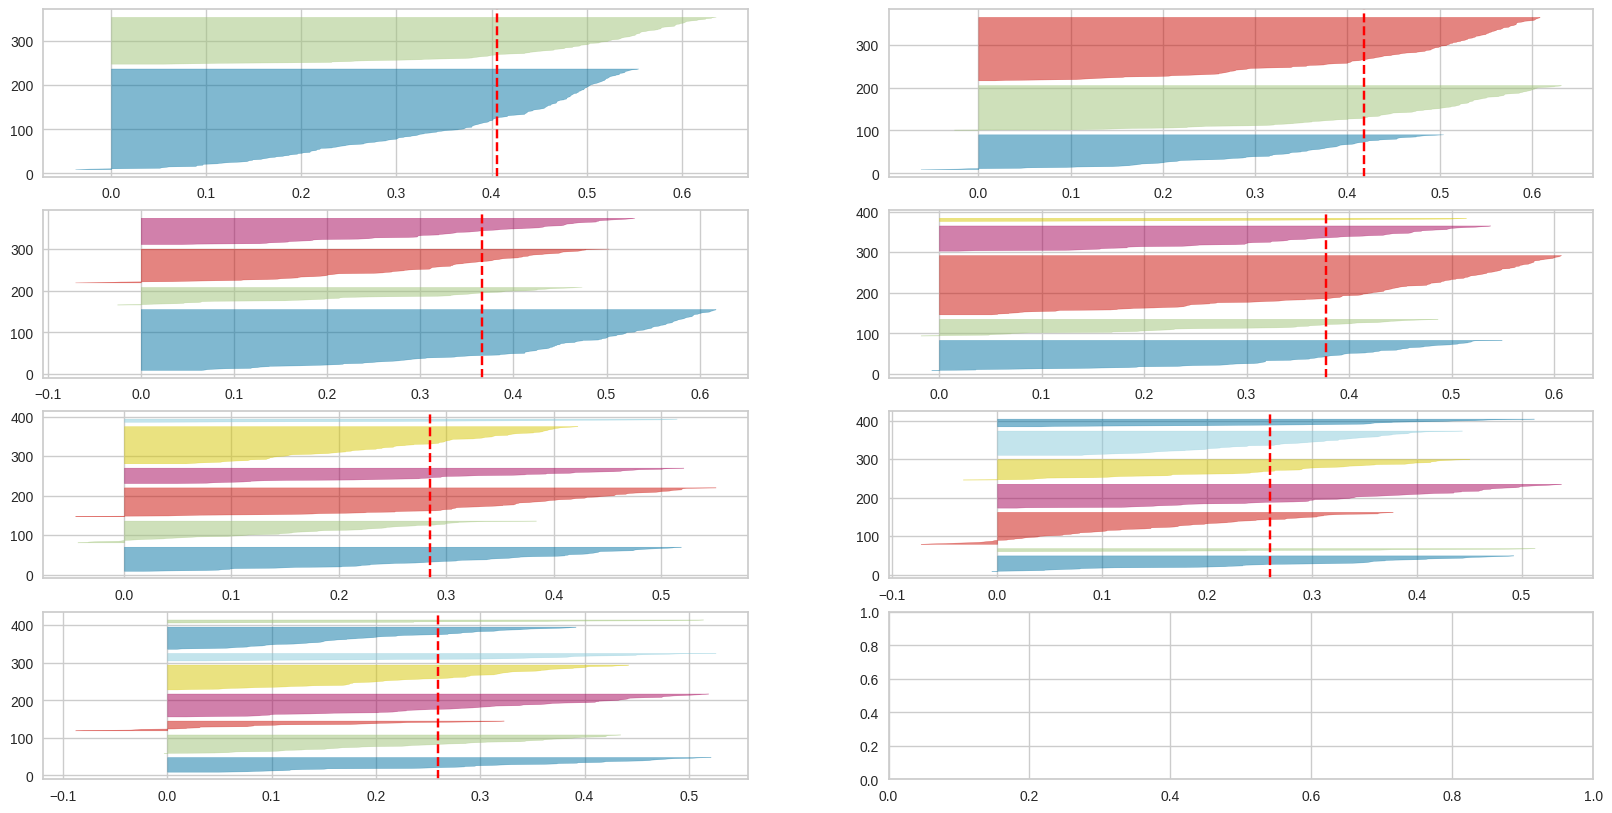

In [79]:
# TODO: Anda dapat menambahkan nilai kemungkinan dari jumlah cluster yang akan dibuat untuk melihat kemungkinan pembentukkan cluster yang lebih baik.
num_of_cluster = [2, 3, 4, 5, 6, 7, 8]

fig, ax = plt.subplots(4, 2, figsize=(20,10))
for k in num_of_cluster:
    # Create KMeans instance for different number of clusters
    clusterer = KMeans(n_clusters = k, n_init=10)

    # Draw silhouette diagram
    q, mod = divmod(k, 2)
    visualizer = SilhouetteVisualizer(clusterer, colors = 'yellowbrick', ax = ax[q-1][mod])
    visualizer.fit(X)

    # Compute silhoutte score
    # This gives a perspective into the density and separation of the formed clusters
    cluster_labels = clusterer.fit_predict(X)
    silhouette_avg = silhouette_score(X, cluster_labels)
    print(
        "For n_clusters =",
        k,
        "The average silhouette_coefficient is :",
        silhouette_avg,
    )

In [80]:
# TODO: Anda dapat menyesuaikan nilai dari n_clusters
kmeans = KMeans(n_clusters=3)

cluster_assignment = kmeans.fit_predict(X)
data_with_clusters = pd.DataFrame(X.copy(), columns=('gvh', 'alm1'))
data_with_clusters['Clusters'] = cluster_assignment
data_with_clusters

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


,gvh,alm1,Clusters
0,0.29,0.24,2
1,0.40,0.35,2
2,0.40,0.37,2
3,0.49,0.45,0
4,0.32,0.25,2
...,...,...,...
331,0.56,0.68,0
332,0.57,0.35,0
333,0.60,0.39,0
334,0.61,0.42,0


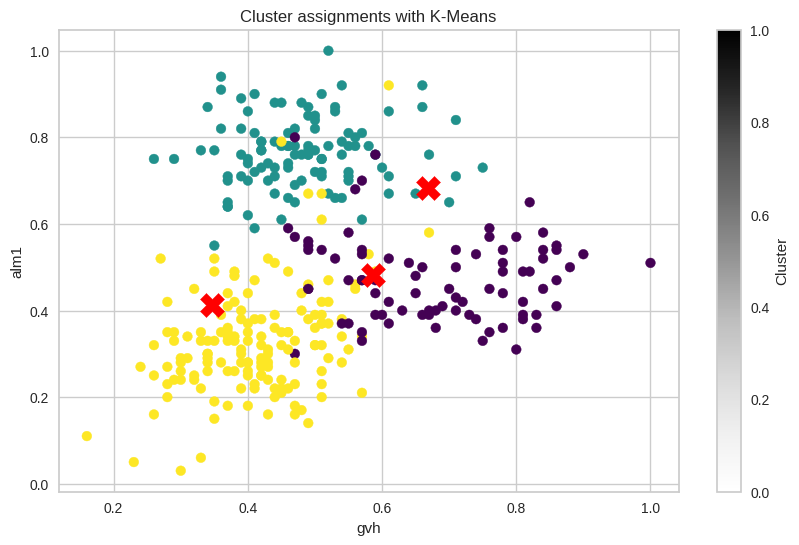

In [81]:
# TODO: Tunjukkan plot berdasarkan hasil clustering yang sudah dilakukan.
import matplotlib.pyplot as plt

# Assuming 'gvh' and 'alm1' are the two dimensions you want to plot
plt.figure(figsize=(10, 6))
plt.scatter(data_with_clusters['gvh'], data_with_clusters['alm1'], c=data_with_clusters['Clusters'], cmap='viridis')

# Optionally add centroids to the plot
centroids = kmeans.cluster_centers_
plt.scatter(centroids[:, 0], centroids[:, 1], s=300, c='red', marker='X')

plt.title('Cluster assignments with K-Means')
plt.xlabel('gvh')
plt.ylabel('alm1')
plt.colorbar(label='Cluster')

plt.show()


## Hierarchical Clustering [35]

In [82]:
def plot_dendrogram(model, **kwargs):
    # Create linkage matrix and then plot the dendrogram

    counts = np.zeros(model.children_.shape[0])
    n_samples = len(model.labels_)
    for i, merge in enumerate(model.children_):
        current_count = 0
        for child_idx in merge:
            if child_idx < n_samples:
                current_count += 1  # leaf node
            else:
                current_count += counts[child_idx - n_samples]
        counts[i] = current_count

    linkage_matrix = np.column_stack(
        [model.children_, model.distances_, counts]
    ).astype(float)

    # Plot the corresponding dendrogram
    shc.dendrogram(linkage_matrix, **kwargs)

In [83]:
model = AgglomerativeClustering(distance_threshold = 0, n_clusters = None, linkage = 'ward', affinity = 'euclidean')
clustering = model.fit(X)
clustering.labels_

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_agglomerative.py:983: FutureWarning: Attribute `affinity` was deprecated in version 1.2 and will be removed in 1.4. Use `metric` instead
  warnings.warn(


array([247, 271, 293, 245, 291, 255, 315, 246, 250, 309, 265, 287, 327,
       248, 311, 314, 300, 259, 333, 123, 187, 183, 186, 227, 286, 177,
       325, 272, 335, 322, 326, 305, 122, 324, 251, 320, 313, 174, 275,
       303, 330, 196, 288, 216, 239, 319, 198, 237, 234, 321, 238, 301,
       258, 225, 194, 199, 274, 278, 244, 281, 159, 285, 282, 233, 210,
       169, 331, 228, 334, 306, 218, 240, 332, 241, 215, 179, 270, 283,
       295, 318, 162, 284, 302, 202, 189, 277, 256, 236, 253, 231, 307,
       116, 192, 208, 219, 312, 308, 217, 180, 257, 209, 294, 220, 226,
       328, 152, 296, 269, 176, 185, 190, 310, 167, 160, 299, 316, 279,
       108, 232, 170, 173, 147, 154,  86, 166, 249, 168, 150, 165, 222,
       175, 134, 221, 171, 224, 329, 235, 323,  87, 230, 184, 267, 243,
       203, 118, 146, 188, 304,  82, 273, 229, 266, 201, 263, 252, 204,
       107, 149, 153, 163, 193, 181, 109, 254, 207, 151, 157, 117, 191,
       205, 182, 268, 276, 137, 178, 115, 195, 121, 132, 133, 12

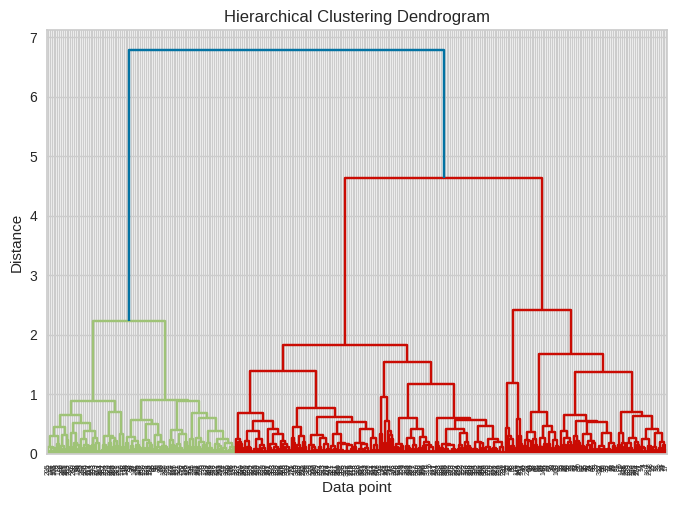

In [84]:
# TODO: Tampilkan dendrogram dari data yang sudah ada.
plt.title('Hierarchical Clustering Dendrogram')
plot_dendrogram(clustering, labels=clustering.labels_)
plt.xlabel("Data point")
plt.ylabel("Distance")
plt.show()

In [85]:
clustering = AgglomerativeClustering(n_clusters=3, linkage='ward', affinity='euclidean')
data_with_clusters['Agg_clusters'] = clustering.fit_predict(X)
data_with_clusters

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_agglomerative.py:983: FutureWarning: Attribute `affinity` was deprecated in version 1.2 and will be removed in 1.4. Use `metric` instead
  warnings.warn(


,gvh,alm1,Clusters,Agg_clusters
0,0.29,0.24,2,2
1,0.40,0.35,2,2
2,0.40,0.37,2,0
3,0.49,0.45,0,0
4,0.32,0.25,2,2
...,...,...,...,...
331,0.56,0.68,0,0
332,0.57,0.35,0,0
333,0.60,0.39,0,0
334,0.61,0.42,0,0


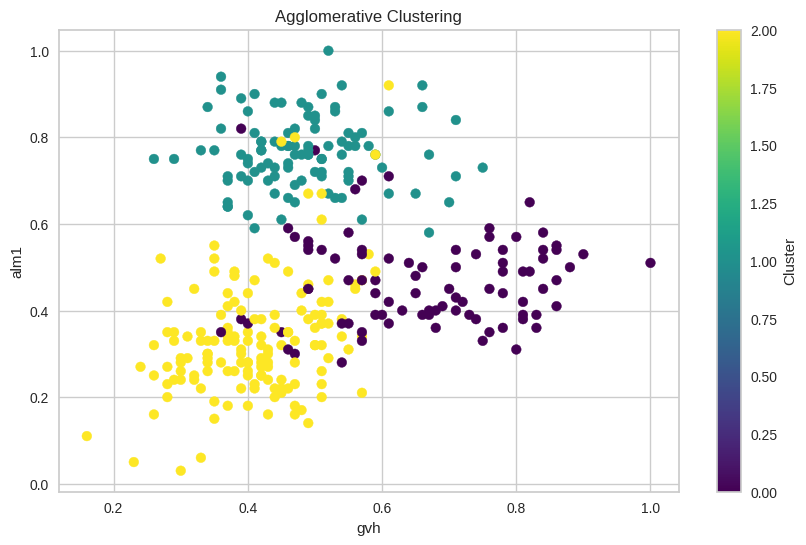

In [86]:
# TODO: Tunjukkan plot berdasarkan hasil clustering yang sudah dilakukan.
import matplotlib.pyplot as plt

# Assuming 'column1' and 'column2' are the two columns in your DataFrame you want to use for the plot
plt.figure(figsize=(10, 6))
plt.scatter(data_with_clusters['gvh'], data_with_clusters['alm1'], c=data_with_clusters['Agg_clusters'], cmap='viridis')

plt.title('Agglomerative Clustering')
plt.xlabel('gvh')  # Replace with your actual column name
plt.ylabel('alm1')  # Replace with your actual column name
plt.colorbar(label='Cluster')

plt.show()


# **Latihan Soal Teoritis** [30]

1. Dari hasil clustering yang telah dihasilkan menggunakan `KMeans`, berikan interpretasi mengenai _cluster-cluster_ yang terbentuk! [4]

2. **Selain dari algoritma yang sudah diberitahukan pada bagian sebelumnya**, jelaskan 4 algoritma beserta cara kerjanya secara **singkat** dalam melakukan proses _clustering_! [4]

3. Sebutkan 3 metrik evaluasi yang dapat digunakan untuk mengevaluasi hasil dari _clustering_ serta jelaskan masing-masing dari metrik tersebut! [6]

4. Jelaskan cara menghitung *intra-cluster similarity* dan *inter-cluster dissimilarity*! Menurut pemahaman Anda, apakah yang membuat suatu klaster dianggap baik berdasarkan kedua metrik di atas? [6]

5. Menurut Anda, mengapa algoritma K-Means tidak baik untuk dapat diterapkan pada data pengelompokkan yang tidak bersifat globular? Jelaskan alasannya berdasarkan cara perhitungan pada algoritma K-Means. [10]

1. Jawaban

>Melihat plot yang disajikan, terdapat tiga kelompok yang dibentuk oleh algoritma KMeans. Kluster berwarna kuning yang terletak di bagian bawah terlihat memiliki konsentrasi data yang tinggi, menandakan tingkat keseragaman yang tinggi dalam kluster tersebut. Sebaliknya, kluster berwarna ungu di sisi kanan menunjukkan penyebaran yang lebih luas, yang mengindikasikan variasi yang lebih besar di antara anggota klusternya. Kluster berwarna teal di atas kiri terlihat sedikit beririsan dengan kluster ungu, menunjukkan bahwa mungkin terdapat karakteristik yang tumpang tindih atau pertimbangan untuk jumlah kluster yang berbeda. Pusat dari setiap kluster, yang ditandai dengan simbol 'X' merah, memberikan representasi visual dari titik tengah kluster tersebut.



2. Jawaban
> - Agglomerative Hierarchical Clustering: Algoritma ini memulai dengan menganggap setiap titik data sebagai cluster tersendiri. Bertahap, algoritma menggabungkan pasangan cluster terdekat hingga terbentuk satu cluster besar atau hingga tercapai jumlah cluster yang diinginkan. Proses ini sering divisualisasikan menggunakan dendrogram.
> - DBSCAN (Density-Based Spatial Clustering of Applications with Noise): Algoritma ini mengidentifikasi cluster berdasarkan kerapatan titik data. DBSCAN menggabungkan titik-titik yang berdekatan dalam area yang padat dan menandai titik-titik yang jarang sebagai noise atau outlier.
> - Mean Shift: Algoritma ini berupaya menemukan centroid dengan cara meng-update calon centroid ke rata-rata titik di dalam window lokalnya. Proses ini diulangi hingga convergence, dengan asumsi bahwa titik-titik data akan "bergerak" menuju titik kepadatan tertinggi.
> - Spectral Clustering: Algoritma ini menggunakan eigenvalues dari matriks laplacian graf untuk melakukan reduksi dimensi sebelum menerapkan algoritma clustering seperti KMeans. Sangat berguna untuk data yang memiliki struktur kompleks atau cluster yang tidak globular.

3. Jawaban
> - Silhouette Score: Metrik ini mengukur seberapa baik sebuah titik data dikelompokkan dengan menghitung jarak antara titik tersebut dengan titik-titik lain dalam cluster yang sama (cohesion) dan titik-titik dalam cluster terdekat lainnya (separation). Nilai yang lebih tinggi menunjukkan pembagian cluster yang lebih baik.
> - Davies-Bouldin Index: Metrik ini mengukur rata-rata "kesamaan" antar cluster, yang diukur dari rasio jarak intra-cluster dan inter-cluster. Nilai yang lebih rendah menandakan pembagian cluster yang lebih baik.
> - Calinski-Harabasz Index: Juga dikenal sebagai Variance Ratio Criterion, metrik ini adalah rasio antara dispersi antar-cluster dan intra-cluster. Nilai yang lebih tinggi menunjukkan cluster yang lebih terdefinisi dengan baik.

4. Jawaban
> Intra-cluster similarity dihitung dengan mengukur seberapa dekat titik-titik data dalam satu klaster. Biasanya diukur dengan jarak antara titik-titik data ke centroid mereka. Inter-cluster dissimilarity dihitung dengan mengukur seberapa jauh berbedanya klaster satu dengan yang lainnya, bisa dengan mengukur jarak antara centroid klaster-klaster tersebut. Klaster yang baik dianggap memiliki intra-cluster similarity yang tinggi (data dalam klaster sangat mirip satu sama lain) dan inter-cluster dissimilarity yang tinggi (klaster-klaster tersebut sangat berbeda satu sama lain).

5. Jawaban
> Algoritma K-Means mungkin tidak baik untuk data yang tidak bersifat globular karena algoritma ini mengasumsikan bahwa cluster memiliki bentuk hampir bulat dan ukuran yang serupa. Hal ini disebabkan oleh cara perhitungan K-Means yang berfokus pada minimisasi varians dalam sebuah cluster. Jika data memiliki distribusi yang memanjang, berbentuk cincin, atau memiliki kepadatan yang berbeda, K-Means mungkin tidak bisa mengidentifikasi batas cluster dengan baik karena centroid yang dihasilkan tidak akan akurat merepresentasikan pusat sebenarnya dari data tersebut.

_Note: Untuk menjawab pertanyaan diatas, Anda dapat menambahkan beberapa text cell sesuai kebutuhan_